In [1]:
import matplotlib.pyplot as plt
import csv
import json
import re

In [2]:
filename = 'moby_dick.txt'


In [3]:
with open(filename, 'r', encoding='utf-8') as f:
    text = f.read()

In [4]:
print("Loaded:", len(text), "characters")

Loaded: 1219043 characters


In [5]:
start_match = re.search(r'CHAPTER\s+1\.', text)
book_text = text[start_match.start():] if start_match else text

In [6]:
#split into chapters
chapters = re.split(r'(CHAPTER [IVXLCDM\d]+\. .+)', book_text)

chapter_titles = []
chapter_texts = []
for i in range(1, len(chapters), 2):
    chapter_titles.append(chapters[i].strip())
    chapter_texts.append(chapters[i+1].strip())

print("Chapters found:", len(chapter_titles))

Chapters found: 284


In [7]:
print("Number of chapters:", len(chapter_titles))
print("First 10 chapter titles:")
for i, t in enumerate(chapter_titles[:10], 1):
    print(i, repr(t))


Number of chapters: 284
First 10 chapter titles:
1 'CHAPTER 1. Loomings.'
2 'CHAPTER 2. The Carpet-Bag.'
3 'CHAPTER 3. The Spouter-Inn.'
4 'CHAPTER 4. The Counterpane.'
5 'CHAPTER 5. Breakfast.'
6 'CHAPTER 6. The Street.'
7 'CHAPTER 7. The Chapel.'
8 'CHAPTER 8. The Pulpit.'
9 'CHAPTER 9. The Sermon.'
10 'CHAPTER 10. A Bosom Friend.'


Enter word to search:  sea


Plotted chapters: 124 from original 284
First plotted chapter index: 135


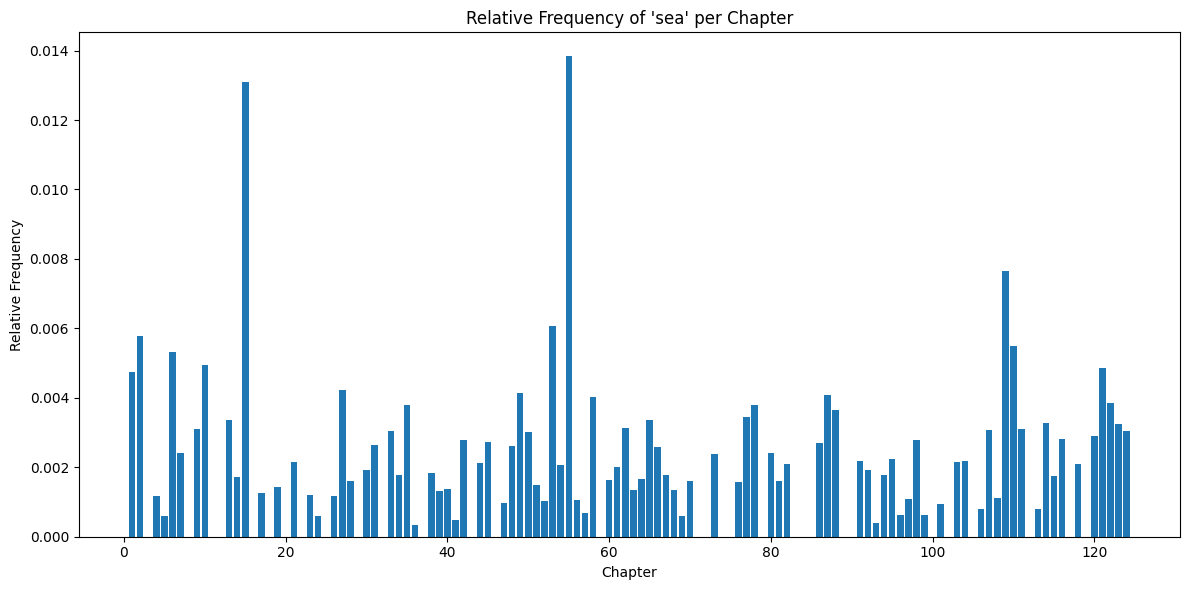

In [16]:
# 3.1 Visualization of Individual Word Frequencies
search_word = input("Enter word to search: ").lower()
rel_freqs = []
real_chapter_indices = []

for idx, chapter in enumerate(chapter_texts, start=1):
    words = re.findall(r'\b\w+\b', chapter.lower())
    total_words = len(words)

    # Skip tiny sections (headings, blank bits, etc.)
    if total_words < 500:   
        continue

    word_count = words.count(search_word)
    rel_freq = word_count / total_words if total_words > 0 else 0

    real_chapter_indices.append(idx)
    rel_freqs.append(rel_freq)

print("Plotted chapters:", len(real_chapter_indices),
      "from original", len(chapter_texts))
print("First plotted chapter index:", real_chapter_indices[0])


plt.figure(figsize=(12, 6))
plt.bar(range(1, len(rel_freqs) + 1), rel_freqs, width=0.8)
plt.title(f"Relative Frequency of '{search_word}' per Chapter")
plt.xlabel("Chapter")
plt.ylabel("Relative Frequency")
plt.tight_layout()
plt.show()


In [12]:
from collections import Counter


In [14]:
# 3.2 Aggregation of Word Occurrences
csv_rows = []
json_data = {}

for title, chapter in zip(chapter_titles, chapter_texts):
    words = re.findall(r'\b\w+\b', chapter.lower())
    total_words = len(words)
    unique_words = len(set(words))
    word_counts = dict(Counter(words))

    csv_rows.append([title, total_words, unique_words])
    json_data[title] = word_counts

with open('chapters_summary.csv', 'w', newline='', encoding='utf-8') as f:
    writer = csv.writer(f)
    writer.writerow(['chapter-name', 'chapter-length', 'unique-words'])
    writer.writerows(csv_rows)

with open('chapters_word_counts.json', 'w', encoding='utf-8') as f:
    json.dump(json_data, f, indent=2)

In [15]:
# 3.3 Most Common Words
with open('chapters_word_counts.json', 'r', encoding='utf-8') as f:
    all_chapter_words = json.load(f)

total_counts = Counter()
for chapter_counts in all_chapter_words.values():
    total_counts.update(chapter_counts)

for i, (word, count) in enumerate(total_counts.most_common(10), 1):
    print(f"{i}. {word}: {count}")

1. the: 14065
2. of: 6458
3. and: 6309
4. a: 4626
5. to: 4538
6. in: 4067
7. that: 3025
8. it: 2494
9. his: 2491
10. i: 2103
